##matplotlib
 importing matplot library use of  data visualization and graphical plotting.

#to_categorical
"""
function known as to_categorical. Performs the conversion from an integer class vector to a binary class matrix. For example, this may be used with the categorical cross-entropy.
 y: A structure similar to an array, containing class values that need to be translated into a matrix (integers ranging from 0 to num_classes minus 1).

"""



#ImageDataGenerator

""" If you use the ImageDataGenerator class, your model will be able to receive new iterations of the photographs at each epoch. This will be possible because of how the class
 works. Be mindful, however, that it will just return the photographs that have been changed; it will not add these pictures to the collection of photographs that you already own.

"""


#confusion_matrix
A confusion matrix is a summarised table that is used to evaluate the performance of a model for classification. This kind of matrix is also referred to as an error matrix. Count data are used to compile a summary of both the number of accurate and wrong predictions, which is then broken down by every category.


#classification report
In the field of machine learning, it is a performance assessment statistic that displays the accuracy, recall, F1 Score, and support score of your learned classification mode.

In [ ]:
import numpy as np
# importing numpy library 
import matplotlib.pyplot as matplot
# importing matplot library use of  data visualization and graphical plotting.
import cv2
#importing cv2 library 
import os
from sklearn.utils import shuffle
# importing shuffle
import glob
#importing glob library
import tqdm
#importing tqdm library
from sklearn.model_selection import train_test_split
import seaborn as sns
from skimage import io
import random
# Import the SMOTE oversampling algorithm
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
"""
function known as to_categorical. Performs the conversion from an integer class vector to a binary class matrix. For example, this may be used with the categorical cross-entropy.
 y: A structure similar to an array, containing class values that need to be translated into a matrix (integers ranging from 0 to num_classes minus 1).

"""
from tensorflow.keras.utils import to_categorical

""" If you use the ImageDataGenerator class, your model will be able to receive new iterations of the photographs at each epoch. This will be possible because of how the class
 works. Be mindful, however, that it will just return the photographs that have been changed; it will not add these pictures to the collection of photographs that you already own.

"""
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#It takes the form of a table that is used to classification issues in order to determine where in the model mistakes occurred.
from sklearn.metrics import confusion_matrix
#In the field of machine learning, it is a performance assessment statistic that displays the accuracy, recall, F1 Score, and support score of your learned classification mode.
from sklearn.metrics import classification_report

# importing model
from tensorflow.keras.layers import MaxPooling2D,BatchNormalization
from tensorflow.keras.layers import Dense,Activation
# importing Dense,Activation library
from tensorflow.keras.layers import Flatten,Dropout,SpatialDropout2D,AveragePooling2D,GlobalAveragePooling2D
# importing Flatten,Dropout,SpatialDropout2D,AveragePooling2D,GlobalAveragePooling2D library
from tensorflow.keras.optimizers import Adam
# importing  Adam library
import tensorflow as tf # importing  tf 
from tensorflow.keras import Model # importing model 




In [ ]:
# Reading dataset 
spect_mpi_image_data=glob.glob("/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/*/*/*")

In [ ]:
spect_mpi_image_data # show data

['/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/TrainSet/Normal/1005.jpg',
 '/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/TrainSet/Normal/1025.jpg',
 '/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/TrainSet/Normal/1009.jpg',
 '/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/TrainSet/Normal/1016.jpg',
 '/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/TrainSet/Normal/1021.jpg',
 '/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/TrainSet/Normal/1007.jpg',
 '/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/TrainSet/Normal/1013.jpg',
 '/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/TrainSet/Normal/1020.jpg',
 '/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/TrainSet/Normal/1011.jpg',
 '/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/TrainSet/Normal/1001.jpg',
 '/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/TrainSet/Normal/1002.jpg',
 '/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/TrainSe

In [ ]:
len(spect_mpi_image_data) # print dataset lenth

192

(-0.5, 149.5, 149.5, -0.5)

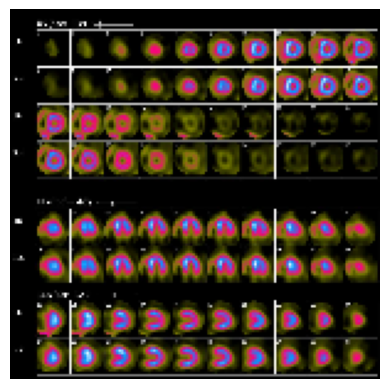

In [ ]:
# Read an image from the image dataset
img_array = cv2.imread(image_dataset[28])

# Resize the image to a new size (150 x 150)
new_arr = cv2.resize(img_array,(150, 150))

# Display the resized image using a grayscale colormap
matplot.imshow(new_arr, cmap='gray')

# Turn off the axis labels
matplot.axis("off");

In [ ]:

from skimage import io

def normalize_image(image):
    # Convert image to float
    image = image.astype(np.float32)
    # Normalize image to range [0, 1]
    image /= 255.0
    mean = np.mean(image)
    std = np.std(image)
    image = (image - mean) / std
    return image
image = cv2.imread(spect_mpi_image_data[28])

# Normalize image
normalized_image = normalize_image(img_array)


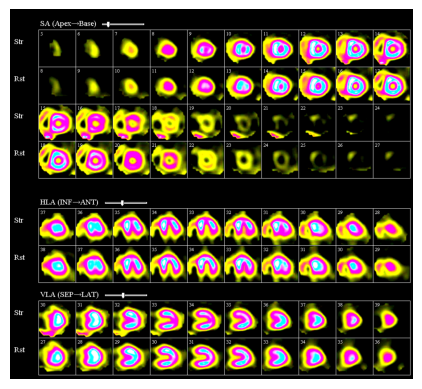

In [ ]:

matplot.imshow(normalized_image,)
matplot.axis("off");

In [ ]:
import tqdm
data = []  # List to store normalized images
labels = []  # List to store corresponding labels

def normalize_image(image):
   # Change the data type of the picture to float32
    image = image.astype(np.float32)
    # Standardise the picture by dividing its width and height by 255.0
    image /= 255.0
    # Determine the image's mean value as well as its standard deviation.
    mean = np.mean(image)
    std = np.std(image)
   # Normalise the picture by deducting the mean from it, then dividing the result by the standard deviation
    image = (image - mean) / std
    return image

# Iterate over each image in image_dataset
for i in tqdm.tqdm(range(len(spect_mpi_image_data))):
    # Read the image using cv2
    img = cv2.imread(spect_mpi_image_data[i])
    # Resize the image to (150, 150)
    img = cv2.resize(img, (150, 150))

    # Normalize the image
    normalized_image = normalize_image(img)

    # Append normalized image to the data list
    data.append(normalized_image)

    # Get the label for the class from the picture location.
    cls = spect_mpi_image_data[i].split(os.path.sep)[-2]
    if cls == 'Normal':
        lbl = 0  # Assign label 0 for 'Normal' class
    elif cls == 'Abnormal':
        lbl = 1  # Assign label 1 for 'Abnormal' class
    else:
        lbl = -1  # Handle the case where class is neither 'Normal' nor 'Abnormal'

    # Append label to the labels list
    labels.append(lbl)


100%|██████████| 192/192 [00:02<00:00, 75.39it/s]


In [ ]:
# Shuffle the data and labels in unison
# Combine the data and labels into a single list of tuples
combined = list(zip(data, labels))

# Shuffle the combined list randomly
random.shuffle(combined)

# Unzip the shuffled list back into separate data and labels
data, labels = zip(*combined)

In [ ]:
# Transform the data and labels into arrays of the NumPy data type.
data=np.array(data)
labels=np.array(labels)

In [ ]:

# Calculate the total shape of the data
data_shape = data.shape[1] * data.shape[2] * data.shape[3]

# Reshape the data array
# The first dimension remains the same (data.shape[0])
# The second, third, and fourth dimensions are flattened into a single dimension
data = data.reshape(data.shape[0], data_shape)


In [ ]:


# Create an instance of the SMOTE oversampler
oversample = SMOTE()

# Apply SMOTE oversampling to the data and labels
data, labels = oversample.fit_resample(data, labels)

# Reshape the data array
# Iterate over each data sample
for i in range(len(data)):
    # Reshape the current data sample to have a shape of (150, 150, 3)
    data = data.reshape(len(data), 150, 150, 3)


In [ ]:
data.shape, labels.shape

((300, 150, 150, 3), (300,))

In [ ]:
# Create training and testing sets for the data and labels.
#  `data` is the input data (features)
#  `labels` are the corresponding labels or targets
# `test_size=0.2` specifies the proportion of the data to be used for testing (20% in this case)
Xtrain_spect_mpi_df,Xtest_spect_mpi_df,ytrain_spect_mpi_df,ytest_spect_mpi_df=train_test_split(data, labels, test_size=0.2)

In [ ]:
Xtrain_spect_mpi_df.shape, Xtest_spect_mpi_df.shape

((240, 150, 150, 3), (60, 150, 150, 3))

In [ ]:
ytrain_spect_mpi_df.shape,ytest_spect_mpi_df.shape

((240,), (60,))

In [ ]:
# Convert the labels to categorical format for training data
# to_categorical() is a function that converts integer labels to one-hot encoded format
# ytrain_spect_mpi_df contains the integer labels of the training data
ytrain_spect_mpi_df = to_categorical(ytrain_spect_mpi_df)

# Convert the labels to categorical format for test data
# to_categorical() is a function that converts integer labels to one-hot encoded format
# ytest_spect_mpi_df contains the integer labels of the test data
ytest_spect_mpi_df = to_categorical(ytest_spect_mpi_df)


In [ ]:
ytrain_spect_mpi_df.shape,ytest_spect_mpi_df.shape,

((240, 2), (60, 2))

"""
If you use the ImageDataGenerator class, your model will be able to receive new iterations of the photographs at each epoch. This will be possible because of how the class works. Be mindful, however, that it will just return the photographs that have been changed; it will not add these pictures to the collection of photographs that you already own.

"""

In [ ]:

# Create an instance of the ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15, 
     # Images may be rotated by a maximum of 15 degrees.
    width_shift_range=0.2, 
    # Move pictures to the left or right by up to 20% of their width in each direction.
    height_shift_range=0.2, 
    # Rotate photos horizontally by up to twenty percent of their height.
    shear_range=0.3,  
    # Transformation of shear with a range of 0.3
    zoom_range=0.2,  
    # Zoom in on photos up to 20 percent.
    horizontal_flip=True,  
    # Rotate the photos so they are horizontal.
    vertical_flip=True, 
     # Rotate photos such that they are vertical
    fill_mode='nearest' 
     # Fill in any pixels that have been freshly produced as a result of rotation or shifting
)


In [ ]:
# !pip install efficientnet

In [ ]:
# Import the EfficientNet model from the tfkeras implementation
import efficientnet.tfkeras as efn

# Set the dropout rate for the top layer
top_dropout_rate = 0.2

# Create the base model using EfficientNetB5
# Set include_top=False to exclude the fully-connected top layer
# Set weights='imagenet' to load the pre-trained weights from ImageNet
# Set input_shape=(150, 150, 3) to define the input shape of the model
base_model = efn.EfficientNetB5(include_top=False, weights='imagenet', input_shape=(150, 150, 3))

# Get the output tensor from the base model
x = base_model.output

# Apply Global Average Pooling to reduce the spatial dimensions
x = GlobalAveragePooling2D()(x)

# Apply dropout regularization to prevent overfitting
x = Dropout(top_dropout_rate)(x)

# Create the output layer with 2 units and sigmoid activation for binary classification
outputs = Dense(2, activation='sigmoid')(x)

# Create the final model by specifying the input and output tensors
model = Model(base_model.input, outputs)

# Compile the model
# Set the optimizer to Adam from tf.keras.optimizers module
# Set the loss function to binary cross-entropy for binary classification
# Set metrics to track accuracy during training
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary() #showing model summary 

In [ ]:
# Train the model
# Use the data generator to flow the training data in batches
history = model.fit(
    datagen.flow(Xtrain_spect_mpi_df, ytrain_spect_mpi_df), # Use datagen.flow(Xtrain_spect_mpi_df, ytrain_spect_mpi_df) as the training data
    validation_data=datagen.flow(Xtest_spect_mpi_df, ytest_spect_mpi_df), # Use datagen.flow(Xtest_spect_mpi_df, ytest_spect_mpi_df) as the validation data
    batch_size=16, # Set the batch size to 16, which determines the number of samples processed in each training step
    epochs=100, # Set the number of epochs to 100, which defines the number of times the entire dataset is passed through the model during training
)


Epoch 1/100
8/8 [==============================] - 112s 987ms/step - loss: 0.6724 - accuracy: 0.6167 - val_loss: 0.9360 - val_accuracy: 0.4667
Epoch 2/100
8/8 [==============================] - 4s 466ms/step - loss: 0.6246 - accuracy: 0.6958 - val_loss: 0.8068 - val_accuracy: 0.4667
Epoch 3/100
8/8 [==============================] - 4s 526ms/step - loss: 0.5325 - accuracy: 0.7333 - val_loss: 1.0635 - val_accuracy: 0.4667
Epoch 4/100
8/8 [==============================] - 4s 463ms/step - loss: 0.4358 - accuracy: 0.8042 - val_loss: 3.0985 - val_accuracy: 0.4667
Epoch 5/100
8/8 [==============================] - 4s 501ms/step - loss: 0.5320 - accuracy: 0.7875 - val_loss: 1.1050 - val_accuracy: 0.5833
Epoch 6/100
8/8 [==============================] - 4s 538ms/step - loss: 0.4121 - accuracy: 0.8208 - val_loss: 1.1318 - val_accuracy: 0.6833
Epoch 7/100
8/8 [==============================] - 4s 502ms/step - loss: 0.4837 - accuracy: 0.7958 - val_loss: 1.0977 - val_accuracy: 0.8167
Epoch 8/100

In [ ]:
# Evaluate the model performance on the training dataset
# Compute the loss value and metrics specified during model compilation
# Pass the training features (Xtrain_spect_mpi_df) and corresponding labels (ytrain_spect_mpi_df) to the evaluate() method of the model object
evaluation_results = model.evaluate(Xtrain_spect_mpi_df, ytrain_spect_mpi_df)


8/8 [==============================] - 2s 213ms/step - loss: 0.0736 - accuracy: 0.9750


[0.07359001040458679, 0.9750000238418579]

In [ ]:
# Evaluate the model performance on the training dataset
# Compute the loss value and metrics specified during model compilation
# Pass the testing features (Xtest_spect_mpi_df) and corresponding labels (ytest_spect_mpi_df) to the evaluate() method of the model object
model.evaluate(Xtest_spect_mpi_df,ytest_spect_mpi_df)

2/2 [==============================] - 0s 97ms/step - loss: 0.1601 - accuracy: 0.9500


[0.16014662384986877, 0.949999988079071]

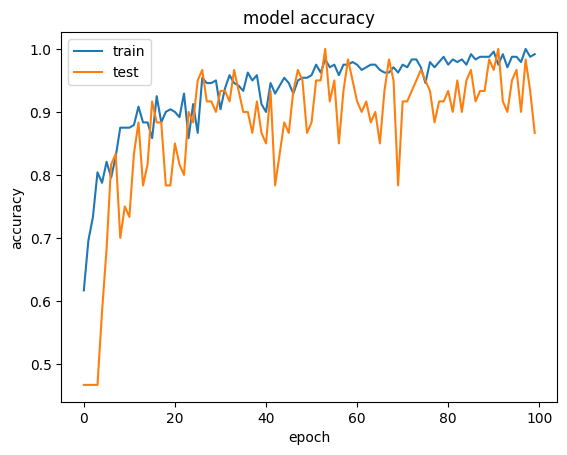

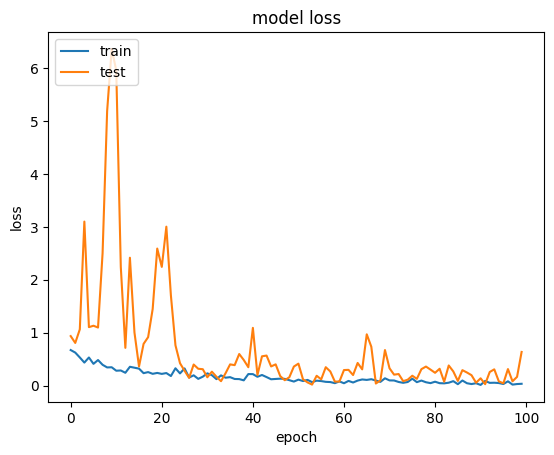

In [ ]:
# Plot the training accuracy and validation accuracy
matplot.plot(history.history['accuracy'])              # Plot the training accuracy
matplot.plot(history.history['val_accuracy'])          # Plot the validation accuracy
matplot.title('model accuracy')                        # Set the title of the plot
matplot.ylabel('accuracy')                             # Set the label for the y-axis
matplot.xlabel('epoch')                                # Set the label for the x-axis
matplot.legend(['train', 'test'], loc='upper left')     # Add a legend to the plot indicating the train and test lines
matplot.show()                                         # Display the plot

# Plot the training loss and validation loss
matplot.plot(history.history['loss'])                  # Plot the training loss
matplot.plot(history.history['val_loss'])              # Plot the validation loss
matplot.title('model loss')                             # Set the title of the plot
matplot.ylabel('loss')                                  # Set the label for the y-axis
matplot.xlabel('epoch')                                 # Set the label for the x-axis
matplot.legend(['train', 'test'], loc='upper left')      # Add a legend to the plot indicating the train and test lines
matplot.show()                                          # Display the plot


In [ ]:
# Predict the labels for the test data using the trained model
y_pred = model.predict(Xtest_spect_mpi_df)

# Convert the predicted probabilities to class labels
# np.argmax returns the indices of the maximum values along an axis
# axis=1 indicates that we want to find the maximum value along the second axis (columns)
y_pred = np.argmax(y_pred, axis=1)

# Convert the true labels to class labels
# np.argmax is used to find the index of the maximum value along the second axis (columns)
# axis=1 indicates that we want to find the maximum value along the second axis (columns)
y_true = np.argmax(ytest_spect_mpi_df, axis=1)


2/2 [==============================] - 3s 136ms/step


#confusion_matrix

It takes the form of a table that is used to classification issues in order to determine where in the model mistakes occurred.

A confusion matrix is a summarised table that is used to evaluate the performance of a model for classification. This kind of matrix is also referred to as an error matrix. Count data are used to compile a summary of both the number of accurate and wrong predictions, which is then broken down by every category.


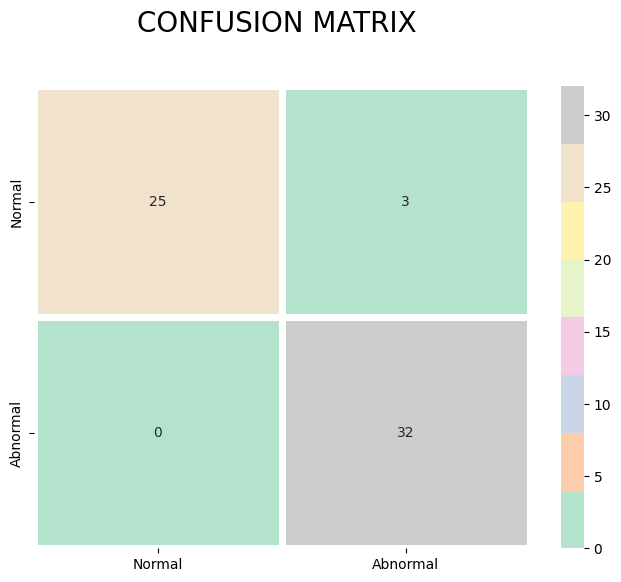

In [ ]:
# plotting confusion matrix for model.
# Set the figure size
matplot.figure(figsize=[8, 6])

# Calculate the confusion matrix
cm = confusion_matrix(y_true,y_pred)

# Create a heatmap visualization of the confusion matrix
sns.heatmap(cm, annot=True, cmap="Pastel2", fmt='g', linewidths=5)

# Set the title of the plot
matplot.title("CONFUSION MATRIX ", y=1.1, fontsize=20)
# Set the tick labels
tick_labels = ['Normal', 'Abnormal']
matplot.xticks(np.arange(len(tick_labels)) + 0.5, tick_labels, fontsize=10)
matplot.yticks(np.arange(len(tick_labels)) + 0.5, tick_labels, fontsize=10)
# Display the plot
matplot.show()

In [ ]:
#classification performance report
#In the field of machine learning, it is a performance assessment statistic that displays the accuracy, recall, F1 Score, and support score of your learned classification mode.
print(classification_report(y_true, y_pred, target_names=labels))

              precision    recall  f1-score   support

      Normal       1.00      0.89      0.94        28
    Abnormal       0.91      1.00      0.96        32

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



In [ ]:
# Define the class labels
labels_new = ['Normal', 'Abnormal']

# Define the image size
IMG_SIZE = 150

# Define a function to prepare the image for prediction
# The function takes a filepath as input
def prepare(filepath):
    # Read the image using cv2.imread
    img = cv2.imread(filepath)

    # Resize the image using cv2.resize
    # The image is resized to the specified IMG_SIZE (150x150)
    resized_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    # Return the resized image
    return resized_img


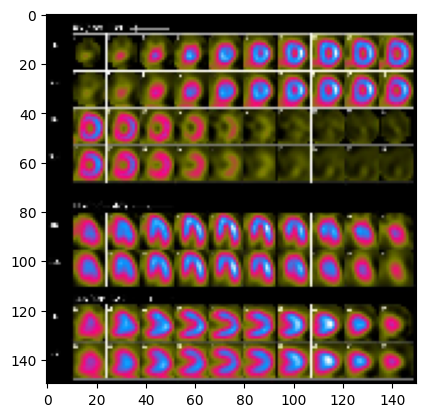

In [ ]:
# Define the file path to the image
file = '/content/drive/MyDrive/shiv/SPECT MPI/SPECT_MPI_Dataset/TestSet/Normal/1039.jpg'

# Use the prepare function to resize and prepare the image
resized_img = prepare(file)

# Display the image using matplotlib.pyplot.imshow
matplot.imshow(resized_img);


In [ ]:
#resize the image
resize_img = resized_img.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [ ]:
#prediction of model
# Use the trained model to predict the class probabilities for the resized image
prediction = model.predict(resized_img)

# Get the index of the predicted class with the highest probability
idx = np.argmax(prediction)

# Use the index to retrieve the corresponding class label from the labels_new list
predicted_label = labels_new[idx]


1/1 [==============================] - 0s 147ms/step


'Normal'